**Homework 7 Template**

Make a copy of this and save as "hw7_name.ipynb"

Name:Jamison Wolsborn

Comments for instructor:


In [2]:
#all the packages I use in this notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft, rfft2, irfft2
from dcst import dct, idct
import rk4

**Exercise 7.3**

In the on-line resources you will find files called _piano.txt_ and _trumpet.txt_, which contain data representing the waveform of a single note, played on, respectively, a piano and a trumpet.

**a)** 
Write a program that loads a waveform from one of these files, plots it, then calculates its discrete Fourier transform and plots the magnitudes of the first 10,000 coefficients in a manner similar to Fig. 7.4.  Note that you will have to use a fast Fourier transform for the calculation because there are too many samples in the files to do the transforms the slow way in any reasonable amount of time.

Apply your program to the piano and trumpet waveforms and discuss briefly what one can conclude about the sound of the piano and trumpet from the plots of Fourier coefficients.

F:\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
F:\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


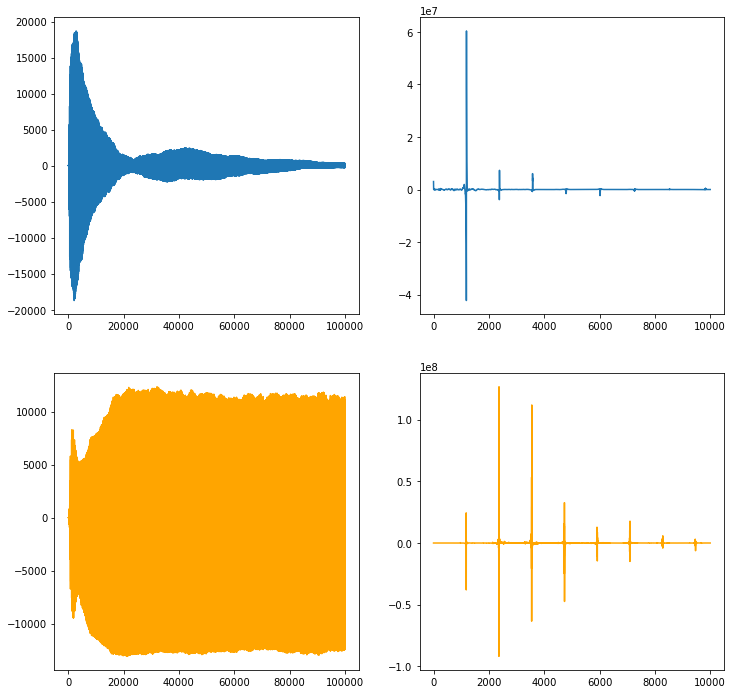

In [65]:
piano = np.loadtxt('piano.txt') #basic load text
trumpet = np.loadtxt('trumpet.txt')
cpiano = rfft(piano) #numpy's fft function supplied in the book
ctrumpet = rfft(trumpet) 

#basic plotting
f,ax = plt.subplots(2,2, figsize=(12,12))
ax[0,0].plot(piano)
ax[1,0].plot(trumpet, color = 'orange')
ax[0,1].plot(cpiano[0:10000])
ax[1,1].plot(ctrumpet[0:10000], color = 'orange')

The sound of the trumpet appears to be more "complex" than the sound of the piano since it has more frequencies associated with it that stand out more. The piano's FFT has one main frequency and a couple of harmonics that are greatly diminished comparitively. 

**Pts /10**

**b)** 
Both waveforms were recorded at the industry-standard rate of 44,100 samples per second and both instruments were playing the same musical note when the recordings were made.  From your Fourier transform results calculate what note they were playing.  (Hint: The musical note middle C has a frequency of 261 Hz.)

In [63]:
max_trumpet_index = np.argmax(ctrumpet, axis = 0) #returns the index location of the maximum value
max_piano_index = np.argmax(cpiano, axis = 0)
print("Max trumpet value is at ", max_trumpet_index)
print("Max piano value is at ", max_piano_index)

Max trumpet value is at  2367
Max piano value is at  1191


I took the piano's max value, because it lined up with the trumpet's first harmonic (although it is a quieter one), and then evaluated it by 1191 * 44100 / 100000 = 525 Hz which is a C, one octave up from middle C. The trumpet's main note that it plays at 2367 is also a C, just played one octave higher than the piano. 

**Pts /5**

**Total Exercise Pts /15**

**Exercise 7.6**

Exercise 7.4 looked at data representing the variation of the Dow Jones Industrial Average, colloquially called "the Dow," over time.  The particular time period studied in that exercise was special in one sense: the value of the Dow at the end of the period was almost the same as at the start, so the function was, roughly speaking, periodic.  In the on-line resources there is another file called _dow2.txt_, which also contains data on the Dow but for a different time period, from 2004 until 2008. Over this period the value changed considerably from a starting level around 9000 to a final level around 14000.

**a)**
Write a program similar to the one for Exercise 7.4, part (e), in which you read the data in the file _dow2.txt_ and plot it on a graph.  Then smooth the data by calculating its Fourier transform, setting all but the first 2\% of the coefficients to zero, and inverting the transform again, plotting the result on the same graph as the original data.  As in Exercise 7.4 you should see that the data are smoothed, but now there will be an additional artifact.  At the beginning and end of the plot you should see large deviations away from the true smoothed function.  These occur because the function is required to be periodic---its last value must be the same as its first---so it needs to deviate substantially from the correct value to make the two ends of the function meet.  In some situations (including this one) this behavior is unsatisfactory.  If we want to use the Fourier transform for smoothing, we would certainly prefer that it not introduce artifacts of this kind.

Make sure your program outputs the original and smoothed data on the same plot, with legend and title indicating its the DFT. 

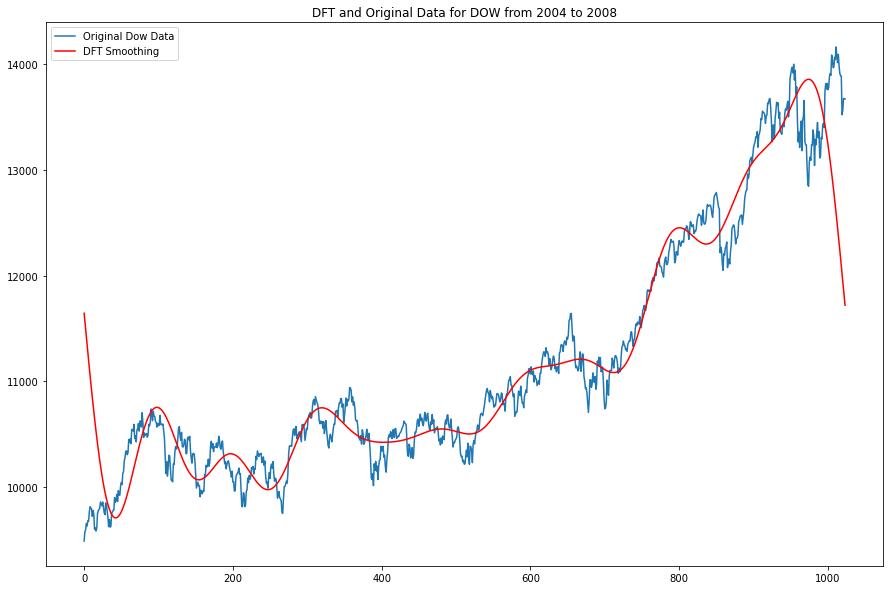

In [102]:
dow = np.loadtxt('dow2.txt')
#take fft of dow
dow_fft = rfft(dow)
#if it isn't within the first 2% then make it zero
for i in range(len(dow_fft)):
    if i <= .02*len(dow_fft):
        pass
    else:
        dow_fft[i] = 0
#take inverse of dow fft
dow_inverse = irfft(dow_fft)
#plot it
plt.figure(figsize=(15,10))
plt.plot(dow, label = 'Original Dow Data')
plt.plot(dow_inverse, color = 'red', label = 'DFT Smoothing')
plt.title("DFT and Original Data for DOW from 2004 to 2008")
plt.legend()

**Pts /10**

**b)** 
Modify your program to repeat the same analysis using discrete cosine transforms.  You can use the functions from _dcst.py_ to perform the transforms if you wish.  Again discard all but the first 2\% of the coefficients, invert the transform, and plot the result.  You should see a significant improvement, with less distortion of the function at the ends of the interval.  This occurs because, as discussed at the end of Section 7.3, the cosine transform does not force the value of the function to be the same at both ends.

Make sure your program outputs the original and smoothed data on the same plot, with legend and title indicating its the DCT.

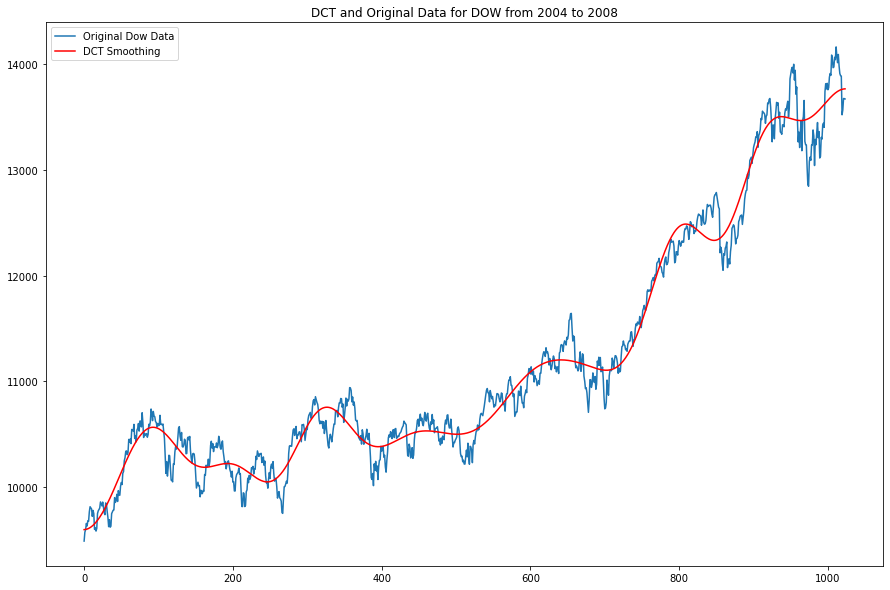

In [110]:
dow_dct = dct(dow)
#if it isn't within the first 2% then make it zero
for i in range(len(dow_dct)):
    if i <= .02*len(dow_dct):
        pass
    else:
        dow_dct[i] = 0

#take inverse of dow_dct        
dow_inverse_dct = idct(dow_dct)

#plot it
plt.figure(figsize=(15,10))
plt.plot(dow, label = 'Original Dow Data')
plt.plot(dow_inverse_dct, color = 'red', label = 'DCT Smoothing')
plt.title("DCT and Original Data for DOW from 2004 to 2008")
plt.legend()

**Pts /10**

**Total Exercise Pts /20**

**Exercise 7.9**

Refer to your textbook for the setup context of this Exercise.

**a)** 
On the web site you will find a file called _blur.txt_ that contains a grid of values representing brightness on a black-and-white photo---a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma=25$.  Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot.  You should see the photo appear.  If you get something wrong it might be upside-down.  Work with the details of your program until you get it appearing correctly.  (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)

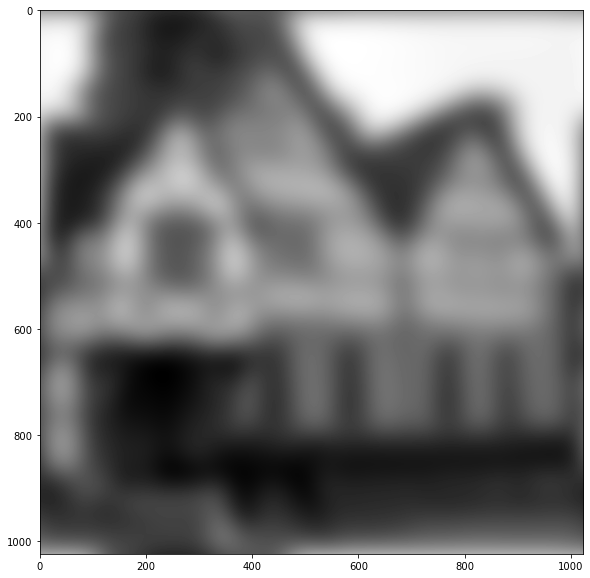

In [4]:
#load up the textfile
blur = np.loadtxt('blur.txt')

#do a super basic image show
plt.figure(figsize=(10,10))
plt.imshow(blur)
plt.gray()

**Pts /5**

**b)** 
Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian $f(x,y)$ above with $\sigma=25$.  Make a density plot of these values on the screen too, so that you get a visualization of your point spread function.  Remember that the point spread function is periodic (along both axes), which means that the values for negative $x$ and $y$ are repeated at the end of the interval.  Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture (refer to your textbook for an image reference).

Hint: It is important that your point spread function looks like the one in the textbook. The psf is essentially symmetric about the midpoint in each dimension. 

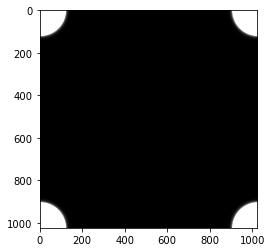

In [6]:
N = len(blur) #number of columns and rows, assuming it is square
sigma = 25 

#function given by the textbook
def f(x,y):
    return np.exp(-(x**2 + y**2)/(2*sigma**2))

gaussian = np.zeros([N,N],float) #initialize the matrix

for i in range(N):
    for j in range(N):
        
        gaussian[i,j] = f((i+N/2)%N - N/2,(j+N/2)%N - N/2) #point spread function

#I feel like this plot should be more like the one in the book        
plt.imshow(gaussian, vmin = 0, vmax = 1e-5)
plt.gray()

**Pts /10**

**c)**
Combine your two programs and add Fourier transforms using the functions _rfft2_ and _irfft2_ from _numpy.fft_, to make a program that does the following:

i) Reads in the blurred photo

ii) Calculates the point spread function

iii) Fourier transforms both

iv) Divides one by the other

v) Performs an inverse transform to get the unblurred photo

vi) Displays the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp.

Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero.  In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very large number (because you're dividing by something small).  A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it---just leave that coefficient alone.  The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$.

[[ 3.92699082e+03+0.00000000e+00j  3.88105860e+03-3.57047161e-14j
   3.74646038e+03+2.49040151e-14j ...  4.98157923e-15+1.84735553e-15j
   3.15615053e-14-2.09338540e-15j -1.86885848e-14+0.00000000e+00j]
 [ 3.88105860e+03+0.00000000e+00j  3.83566363e+03-3.38687411e-14j
   3.70263975e+03+2.50632848e-14j ...  4.85465947e-15+1.82647369e-15j
   3.08791270e-14-2.08556235e-15j -1.85111027e-14+0.00000000e+00j]
 [ 3.74646038e+03+0.00000000e+00j  3.70263975e+03-1.46618828e-14j
   3.57422924e+03+7.07767178e-15j ...  4.48545208e-15+1.76436635e-15j
   2.88889679e-14-2.06175001e-15j -1.79825051e-14+0.00000000e+00j]
 ...
 [ 3.53242311e+03+0.00000000e+00j  3.49110597e+03-6.73072709e-16j
   3.37003162e+03+1.94289029e-16j ...  3.90655296e-15+1.66256198e-15j
   2.57555225e-14-2.02103192e-15j -1.71145180e-14+0.00000000e+00j]
 [ 3.74646038e+03+0.00000000e+00j  3.70263975e+03-2.90947821e-14j
   3.57422924e+03+1.94289029e-16j ...  4.48545208e-15+1.76436635e-15j
   2.88889679e-14-2.06175001e-15j -1.79825051e-

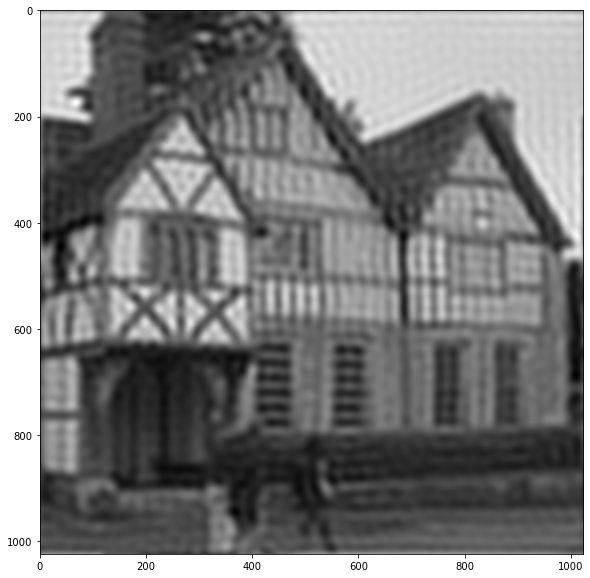

In [7]:
blur_transform = rfft2(blur) #rfft2 is able to do 2 dimensional transforms
gaussian_transform = rfft2(gaussian) #transform both matrices

xlim, ylim = blur_transform.shape #set the bounds of the non-square matrix

unblurred_transform = np.zeros([xlim,ylim],complex) #initialize the matrix

for i in range(xlim):
    for j in range(ylim):
        if abs(gaussian_transform[i,j]) < 10**-4.5: #I tried to get the perfect epsilon value for most clarity
            unblurred_transform[i,j] = blur_transform[i,j] #if it is close to zero, basically do nothing
        else: #if it is not close to zero divide by the gaussian transform
            unblurred_transform[i,j] = blur_transform[i,j] / gaussian_transform[i,j] 

unblurred = irfft2(unblurred_transform) #take the inverse of the transformed image

#plot it
plt.figure(figsize=(10,10))
plt.imshow(unblurred)
plt.gray()

**Pts /10**

**d)**
Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo?  Why can we not perfectly unblur any photo and make it completely sharp?

In [13]:
print(gaussian_transform.shape)
np.count_nonzero(gaussian_transform <= 10**-4.5)

(1024, 513)


522794

Of 525312 individual values in the gaussian_transform matrix there are 522794 of them that are less than the value we decided was close enough to zero that we shouldn't divide by the gaussian_transform. Since this is the majority of the values there is just no possible way that you can get perfect clarity when the majority of your values aren't being divided by the gaussian_transform. 

**Pts /5**

**Total Exercise Pts /30**

**Exercise 8.1**

Refer to your textbook the circuit diagram referred to in this exercise.

Using Ohm's law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows.  Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor.  Then:

\begin{equation*}
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = {d Q\over d t}.
\end{equation*}

Substituting the second equation into the third, then substituting the result into the first equation, we find that $V_\textrm{in} - V_\textrm{out} = RC\>({d V_\textrm{out}/ d t})$, or equivalently

\begin{equation*}
{d V_\textrm{out}\over d t} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
\end{equation*}

**a)**
Write a program (or modify a previous one) to solve this equation for $V_\textrm{out}(t)$ using the fourth-order Runge--Kutta method when in the input signal is a square-wave with frequency 1 and amplitude 1:

\begin{equation*}
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
\end{equation*}

where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer. Use the program to make plots of the output of the filter circuit from $t=0$ to $t=10$ when $RC=0.01$, $0.1$, and 1, with initial condition $V_\textrm{out}(0)=0$.  You will have to make a decision about what value of $h$ to use in your calculation.  Small values give more accurate results, but the program will take longer to run.  Try a variety of different values and choose one for your final calculations that seems sensible to you.

Have your program output each plot (should be plotted separately) with RC value clearly labeled. 

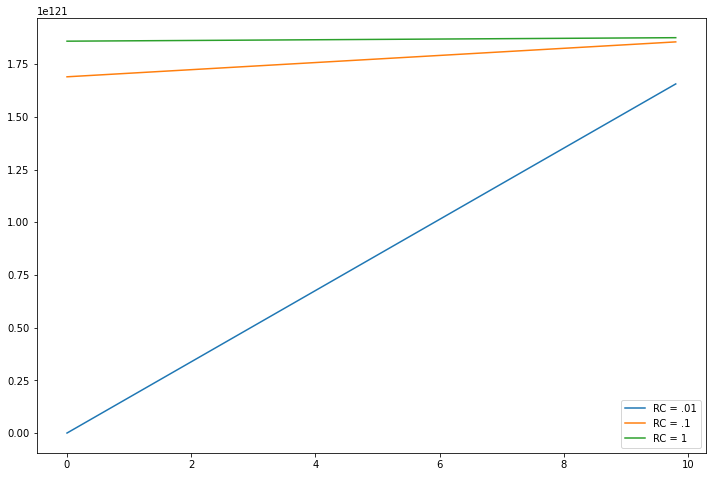

In [95]:
#initialize RC circuit function
def f(x,t,i):
    return 1/(RC[i])*(Vin - Vout)

#set the three values of the RC circuit
RC = [.01,.1,1]

#set bounds
a = 0
b = 10
N = 50
h = (b-a)/N

#intialize matrices
tpoints = np.arange(a,b,h)
x_points = [[],[],[]]
x = 0

#fourth order runge kutta modified to fit the RC list
for i in range(len(RC)):
    for t in tpoints:
        if 2*t%2 == 0:
            Vin = 1
        else:
            Vin = -1
        x_points[i].append(x)
        k1 = h*f(x,t,i)
        k2 = h*f(x+0.5*k1,t+0.5*h,i)
        k3 = h*f(x+0.5*k2,t+0.5*h,i)
        k4 = h*f(x+k3,t+h,i)
        x += (k1+2*k2+2*k3+k4)/6

#plot it
plt.figure(figsize=(12,8))
plt.plot(tpoints,x_points[0], label = "RC = .01")
plt.plot(tpoints,x_points[1], label = "RC = .1")
plt.plot(tpoints,x_points[2], label = "RC = 1")
plt.legend()

**Pts /10**

**b)** 
Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.

It looks like all of the RC circuits with different RC values are converging to a shared asymtote. In all cases the RC circuit starts at a value less than the asymtote and gradually, but non-linearly climbs to it. 

**Pts /5**

**Total Exercise Pts /15**

**Exercise 8.2**

The Lotka--Volterra equations are a mathematical model of predator--prey interactions between biological species.  Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators).  You could think of $x$ and $y$ as being the population in thousands, say, so that $x=2$ means there are 2000 rabbits.  Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes.  But 0.001 is a pretty close spacing of values, so it's a decent approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka--Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

\begin{equation*}
{d x\over d t} = \alpha x - \beta xy,
\end{equation*}

where $\alpha$ and $\beta$ are constants.  At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits---because they need food to grow and reproduce---but also die of old age at a rate proportional to their own population:

\begin{equation*}
{d y\over d t} = \gamma xy - \delta y,
\end{equation*}

where $\gamma$ and $\delta$ are also constants.

**a)**
Write a program to solve these equations using the fourth-order Runge--Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and $\delta=2$, starting from the initial condition $x=y=2$.  Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential equations in this case do not depend explicitly on time $t$---in vector notation, the right-hand side of each equation is a function $f(\vec{r})$ with no $t$ dependence.  You may nonetheless find it convenient to define a Python function _f(r,t)_ including the time variable, so that your program takes the same form as programs given earlier in this chapter. You don't have to do it that way, but it can avoid some confusion. Several of the following exercises have a similar lack of explicit time-dependence.)

Text(0, 0.5, 'Foxes')

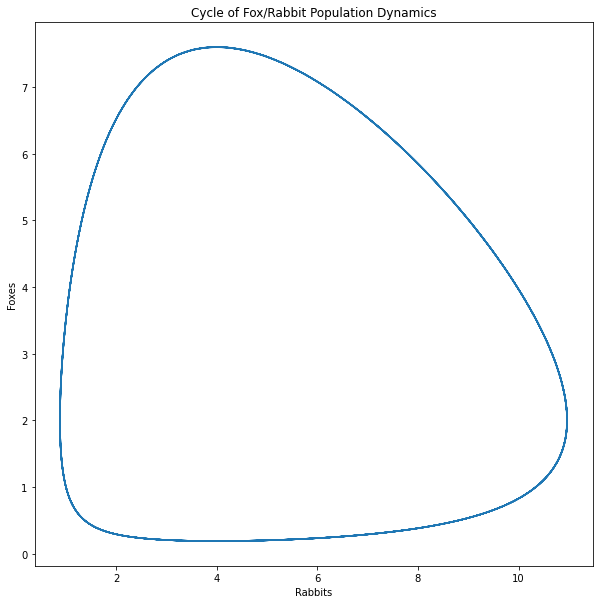

In [104]:
#initialize function
def f(r,t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta * x * y
    fy = gamma*x*y - sigma*y
    return np.array([fx,fy],float)

#set constants
alpha = 1
beta = .5
gamma = .5
sigma = 2

#set initial condition
x = 2
y = 2

#set bounds
a = 0.0
b = 30
N = 1000
h = (b-a)/N

#intialize matrices and lists
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

#fourth order runge kutta
r = np.array([1.0,1.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

#plot it
plt.figure(figsize=(10,10))
plt.plot(xpoints,ypoints)
plt.title("Cycle of Fox/Rabbit Population Dynamics")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")

**Pts /10**

**b)**
Describe in words what is going on in the system, in terms of rabbits and foxes.

The line shows the equilibrium points in which the rabbit and fox population can survive. However, it is not a static equilibrium point. The bottom-most curve shows the birth rate of rabbits when there is very little competition, it increases exponentially the rabbit population gets greater and greater. However, foxes get born as well and as foxes there is a limit in which rabbits can proliferate without their populations being curtailed by foxes which are also being born at a steady rate in comparison to how well they are eating. The left hand side shows what happens when the rabbit population is low, the foxes die off because they don't have a food source. 


**Pts /5**

**Total Exercise Pts /15**

**Extra Credit**

**Exercise 8.3: The Lorenz equations**

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:
$$
{d x\over d t} = \sigma(y-x),\qquad
{d y\over d t} = rx - y - xz,\qquad
{d z\over d t} = xy - bz,
$$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional---they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of *deterministic chaos*, the occurrence of apparently
random motion even though there is no randomness built into the equations.
We encountered a different example of chaos in the logistic map of
Exercise~3.6.

**Part a)** Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=\frac83$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.)


In [9]:
# Type code here

**Part b)** Modify your program to produce a plot of $z$ against $x$.  You should
  see a picture of the famous ``strange attractor'' of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself.

In [10]:
# Type code here

**Extra credit /5**

**Total Pts /95**